In [37]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head(1000)

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,窃盗,自転車盗,習志野,京成津田沼駅前,122165.0,千葉県,習志野市,袖ケ浦２丁目,20240118,17,４階建て以上共同住宅,駐車（輪）場,70歳以上,その他,施錠した
996,窃盗,自転車盗,習志野,京成津田沼駅前,122165.0,千葉県,習志野市,津田沼３丁目,20231101,12,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,30歳代,その他,施錠した
997,窃盗,自転車盗,習志野,京成津田沼駅前,122165.0,千葉県,習志野市,津田沼３丁目,20240322,8,駐車（輪）場,駐車（輪）場,10歳代,高校生,施錠せず
998,窃盗,自転車盗,習志野,京成津田沼駅前,122165.0,千葉県,習志野市,津田沼３丁目,20240508,7,駐車（輪）場,駐車（輪）場,10歳代,高校生,施錠した


自転車盗難件数をまとめる

In [7]:
print("\n===== 盗難件数（総数） =====")
print(f"総件数: {len(df)} 件")


===== 盗難件数（総数） =====
総件数: 9943 件


被害者の特徴（年齢・性別など）が分かればまとめる

In [ ]:
age_col = "被害者の年齢"      
job_col = "被害者の職業"       

for col in [age_col, job_col]:
    if col not in df.columns:
        raise ValueError(f"列 '{col}' が CSV に存在しません。列名を確認してください。")

combo_counts = df.groupby([age_col, job_col]).size().sort_values(ascending=False)

most_common_combo = combo_counts.head(1)
print("===== 最も多い年齢と職業の組み合わせ =====")
print(most_common_combo)

print("\n===== 件数上位10組み合わせ =====")
print(combo_counts.head(10))

===== 最も多い年齢と職業の組み合わせ =====
被害者の年齢  被害者の職業
10歳代    高校生       2205
dtype: int64

===== 件数上位10組み合わせ =====
被害者の年齢  被害者の職業
10歳代    高校生       2205
20歳代    その他       1813
30歳代    その他        982
10歳代    中学生        886
20歳代    大学生        877
40歳代    その他        750
10歳代    大学生        728
50歳代    その他        537
10歳代    その他        348
70歳以上   その他        286
dtype: int64


どの地域で盗難が多いかを示す

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("jitensha.csv")

city_col = "市区町村（発生地）"  

if city_col not in df.columns:
    print(f"列 '{city_col}' が CSV に存在しません。列名を確認してください。")
else:
    city_counts = df[city_col].value_counts()

    print("===== 市区町村別盗難件数（上位10） =====")
    print(city_counts.head(10))


region_col = "発生場所" 

if region_col not in df.columns:
    print(f"列 '{region_col}' が CSV に存在しません。列名を確認してください。")
else:
    region_counts = df[region_col].value_counts()

    print("===== 地域別盗難件数（上位3） =====")
    print(region_counts.head(3))



===== 市区町村別盗難件数（上位10） =====
市区町村（発生地）
船橋市       1263
市川市        872
柏市         691
松戸市        678
千葉市中央区     656
八千代市       458
習志野市       450
浦安市        435
野田市        367
千葉市稲毛区     334
Name: count, dtype: int64
===== 地域別盗難件数（上位3） =====
発生場所
その他                    3077
駐車（輪）場                 2954
その他の住宅（３階建て以下共同住宅等）    1491
Name: count, dtype: int64


どの月が最も多いか

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("jitensha.csv")

date_col = "発生年月日（始期）"


df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

df["month"] = df[date_col].dt.month

month_counts = df["month"].value_counts().sort_index()

print("===== 月別盗難件数 =====")
for m in range(1, 13):
    print(f"{m}月: {month_counts.get(m, 0)}件")

max_month = month_counts.idxmax()
print(f"\n盗難件数が最も多い月: {max_month}月 ({month_counts[max_month]}件)")

===== 月別盗難件数 =====
1月: 620件
2月: 569件
3月: 681件
4月: 761件
5月: 813件
6月: 826件
7月: 1027件
8月: 943件
9月: 984件
10月: 956件
11月: 888件
12月: 782件

盗難件数が最も多い月: 7.0月 (1027件)


どの時間帯に多いか

===== 1〜24時 + 不明 の件数 =====
1時: 74件
2時: 32件
3時: 23件
4時: 30件
5時: 113件
6時: 333件
7時: 919件
8時: 675件
9時: 411件
10時: 433件
11時: 371件
12時: 508件
13時: 390件
14時: 388件
15時: 473件
16時: 695件
17時: 859件
18時: 875件
19時: 606件
20時: 500件
21時: 413件
22時: 311件
23時: 229件
24時: 0件
不明: 115件


C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


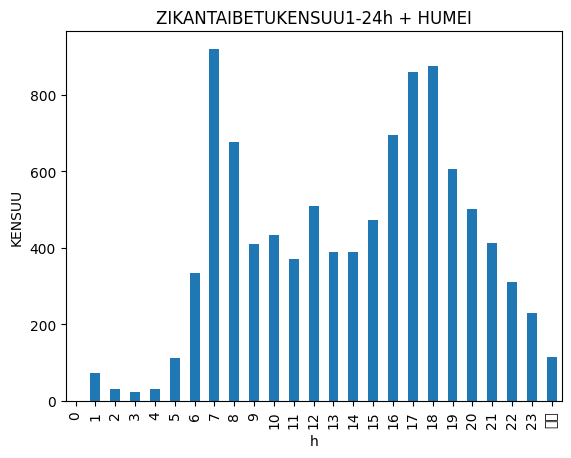

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("jitensha.csv")

time_col = "発生時（始期）"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")

unknown_count = df[time_col].isna().sum()

valid_df = df[df[time_col].between(1, 24)]

hour_counts = valid_df[time_col].value_counts().sort_index()

print("===== 1〜24時 + 不明 の件数 =====")
for h in range(1, 25):
    print(f"{h}時: {hour_counts.get(h, 0)}件")
print(f"不明: {unknown_count}件")

plot_data = hour_counts.reindex(range(0, 24), fill_value=0)
plot_data["不明"] = unknown_count

plot_data.plot(kind="bar")
plt.title("ZIKANTAIBETUKENSUU1-24h + HUMEI")
plt.xlabel("h")
plt.ylabel("KENSUU")
plt.show()


鍵の有無によって盗難件数は変わるのか（Impactのある考察）

In [ ]:
lock_col = "施錠関係"  

valid_values = ["施錠せず", "施錠した"]  # 必要に応じて"不明"も追加
lock_counts = df[lock_col][df[lock_col].isin(valid_values)].value_counts()

print("===== 施錠の有無ごとの件数 =====")
print(lock_counts)



===== 施錠の有無ごとの件数 =====
施錠関係
施錠せず    6781
施錠した    3162
Name: count, dtype: int64


その他、興味深い発見があればまとめる